In [1]:
from pydantic import BaseModel, Field, RootModel
from datetime import datetime
import matplotlib.pyplot as plt

class StockData(BaseModel):
    date: datetime = Field(alias="日期")
    trading_volume: str = Field(alias="成交股數")
    turnover: str = Field(alias="成交金額")
    open_price: float = Field(alias="開盤價")
    high_price: float = Field(alias="最高價")
    low_price: float = Field(alias="最低價")
    close_price: float = Field(alias="收盤價")
    change: float = Field(alias="漲跌價差")
    transactions: str = Field(alias="成交筆數")

class Data(RootModel):
    root: list[StockData]

def parse_custom_date(date_str):
    year = int(date_str[:3]) + 1911  # Convert "113" to four-digit year
    month = int(date_str[4:6])       # Month
    day = int(date_str[7:9])         # Day
    
    return datetime(year, month, day)




In [2]:
#折線圖
def plot_daily_close_price(data: Data, stock_name: str):
    # Filter stock data by stock_name
    stock_data = [entry for entry in data.root if entry.stock_name == stock_name]

    # Extract dates and close prices
    dates = [entry.date for entry in stock_data]
    close_prices = [entry.close_price for entry in stock_data]

    # Plotting the data
    plt.figure(figsize=(10, 6))
    plt.plot(dates, close_prices, marker='o', linestyle='-', color='b', label=f'{stock_name} 收盤價')
    plt.title(f'{stock_name} 1日收盤價折線圖')
    plt.xlabel('日期')
    plt.ylabel('收盤價')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

def aabc():
    print(123)

aabc()


123


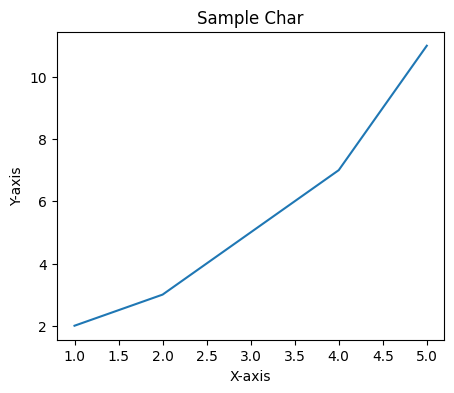

In [14]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(5,4),dpi=100)
axes = figure.add_subplot()
axes.plot([1,2,3,4,5],[2, 3, 5, 7, 11])
axes.set_title("Sample Char")
axes.set_xlabel("X-axis")
axes.set_ylabel("Y-axis")
plt.show()

In [3]:
import matplotlib.pyplot as plt

#直方圖
def plot_daily_trading_volume(data: Data, stock_name: str):
    # Filter stock data by stock_name
    stock_data = [entry for entry in data.root if entry.stock_name == stock_name]

    # Extract trading volumes
    trading_volumes = [int(entry.trading_volume.replace(',', '')) for entry in stock_data]

    # Plotting the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(trading_volumes, bins=20, edgecolor='black')
    plt.title(f'{stock_name} 當日成交量直方圖')
    plt.xlabel('成交股數')
    plt.ylabel('頻率')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')

print(df)

            Date        Open        High         Low       Close   Adj Close  \
0     2008-01-02   61.382053   61.382053   59.599995   59.897003   33.868557   
1     2008-01-03   59.302982   59.401985   58.807968   58.807968   33.252762   
2     2008-01-04   58.708965   59.798000   57.916939   59.401985   33.588646   
3     2008-01-07   56.431889   57.421921   55.243847   55.243847   31.237452   
4     2008-01-08   55.243847   56.035873   54.946838   55.441856   31.349407   
...          ...         ...         ...         ...         ...         ...   
3924  2023-12-25  582.000000  585.000000  580.000000  581.000000  576.073059   
3925  2023-12-26  583.000000  586.000000  582.000000  586.000000  581.030640   
3926  2023-12-27  587.000000  592.000000  586.000000  592.000000  586.979858   
3927  2023-12-28  592.000000  593.000000  589.000000  593.000000  587.971313   
3928  2023-12-29  589.000000  593.000000  589.000000  593.000000  587.971313   

         Volume       sma       rsi    

Text(0, 0.5, 'Volume')

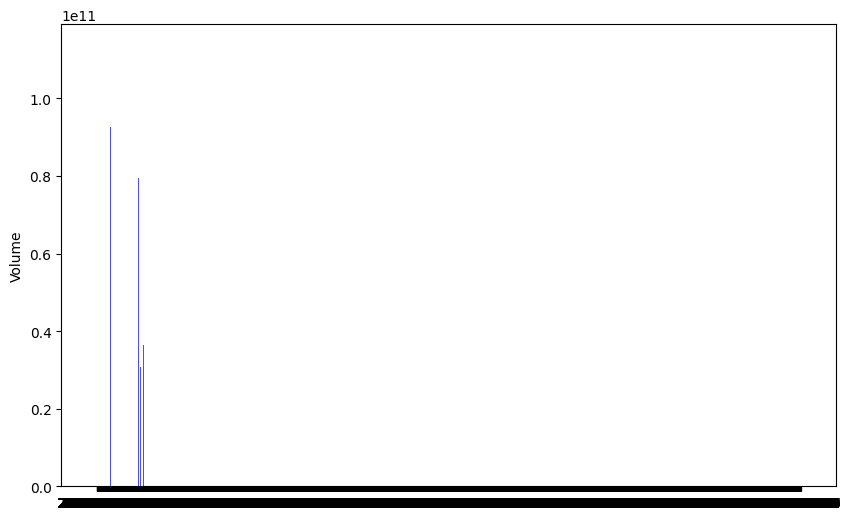

In [5]:


plt.figure(figsize=(10, 6))  # 設定圖形大小

# 繪製直方圖
plt.bar(df['Date'], df['Volume'], align='center', alpha=0.7, color='b')

# 設定標題和標籤
plt.ylabel('Volume')



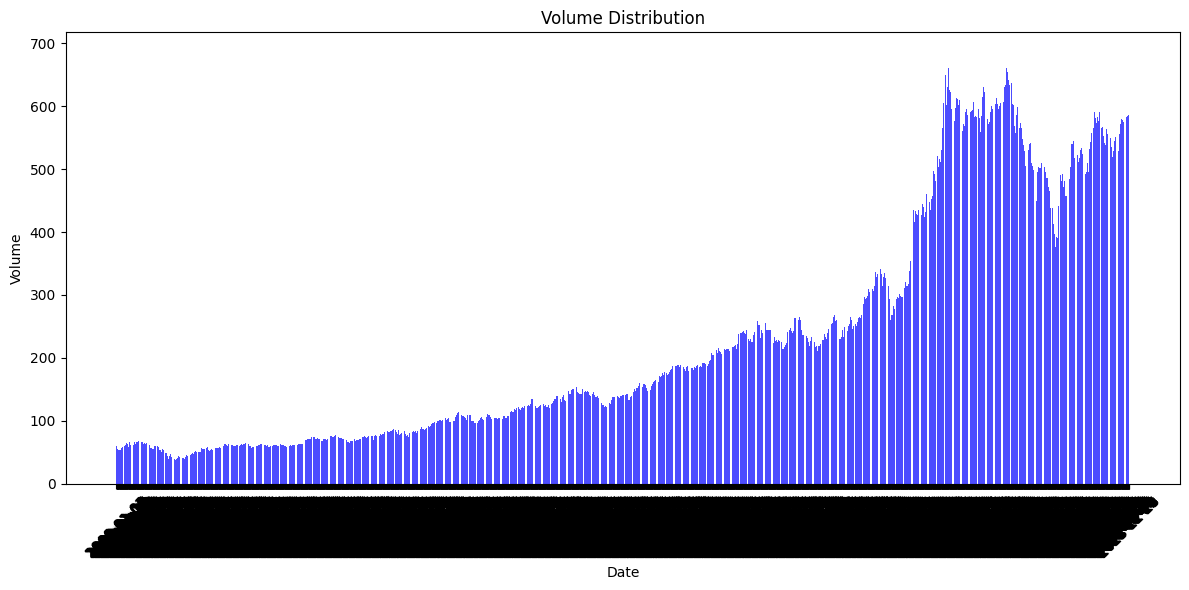

In [6]:
# 假設 X 是日期資料的列表，Y 是相應的交易量資料
plt.figure(figsize=(12, 6))  # 設置圖形大小
# 繪製長條圖
plt.bar(df['Date'], df['Close'], align='center', alpha=0.7, color='b')

# 設定標題和標籤
plt.title('Volume Distribution')
plt.xlabel('Date')
plt.ylabel('Volume')

# 只顯示年份，月份等
plt.xticks(rotation=45)
plt.tight_layout()


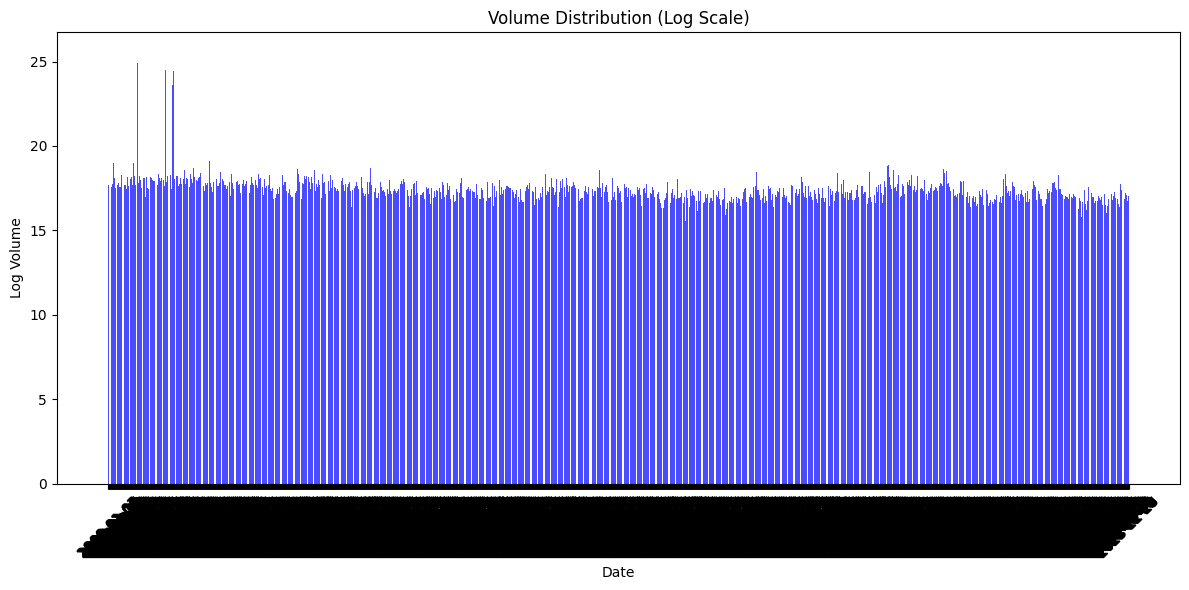

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('data.csv')

# 假設 CSV 檔案中包含 'Date' 和 'Volume' 兩個欄位
X = df['Date']  # 日期資料
Y = df['Volume']  # 交易量資料

# 對 Y 軸進行對數轉換
Y_log = np.log(Y + 1)  # 加1避免 log(0) 的問題，具體根據實際情況調整

plt.figure(figsize=(12, 6))  # 設置圖形大小

# 繪製長條圖
plt.bar(X, Y_log, align='center', alpha=0.7, color='b')

# 設定標題和標籤
plt.title('Volume Distribution (Log Scale)')
plt.xlabel('Date')
plt.ylabel('Log Volume')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()